In [45]:
import pandas as pd
import numpy as np
import missingno

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline 
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [3]:
#def load_housing_data(housing_path = HOUSING_PATH):
#    csv_path = os.path.join(housing_path, "housing.csv")
#    return pd.read_csv(csv_path)

#housing = load_housing_data()
#housing.head()

housing = pd.read_csv('handson-ml2-master/datasets/housing/housing.csv')
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
housing.info()     # quick infromation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**All attributes are numerical, except the ocaen_proximity which is object. 
So object could hold any kind of Python object, but since we loaded this data from CSV file it must be a text attribute.
From the above info we can  understand that it must be a repetitive categorical data.**

- Use value_counts() method to find the category 

In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe() # Gives a summary of numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

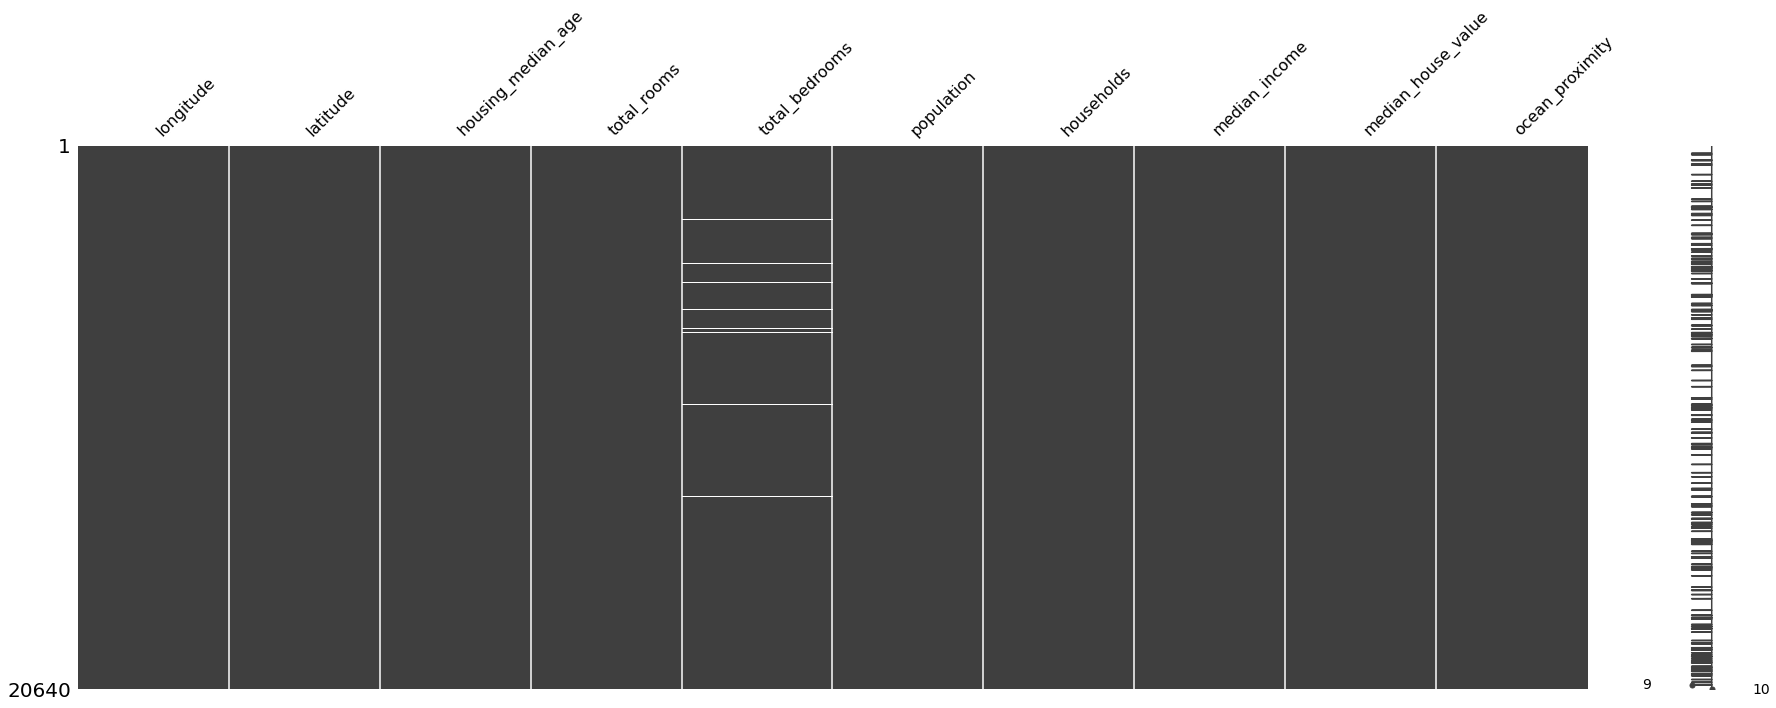

In [7]:
# Quick way to identity missing infromation from a given data
missingno.matrix(housing, figsize = (30, 10))

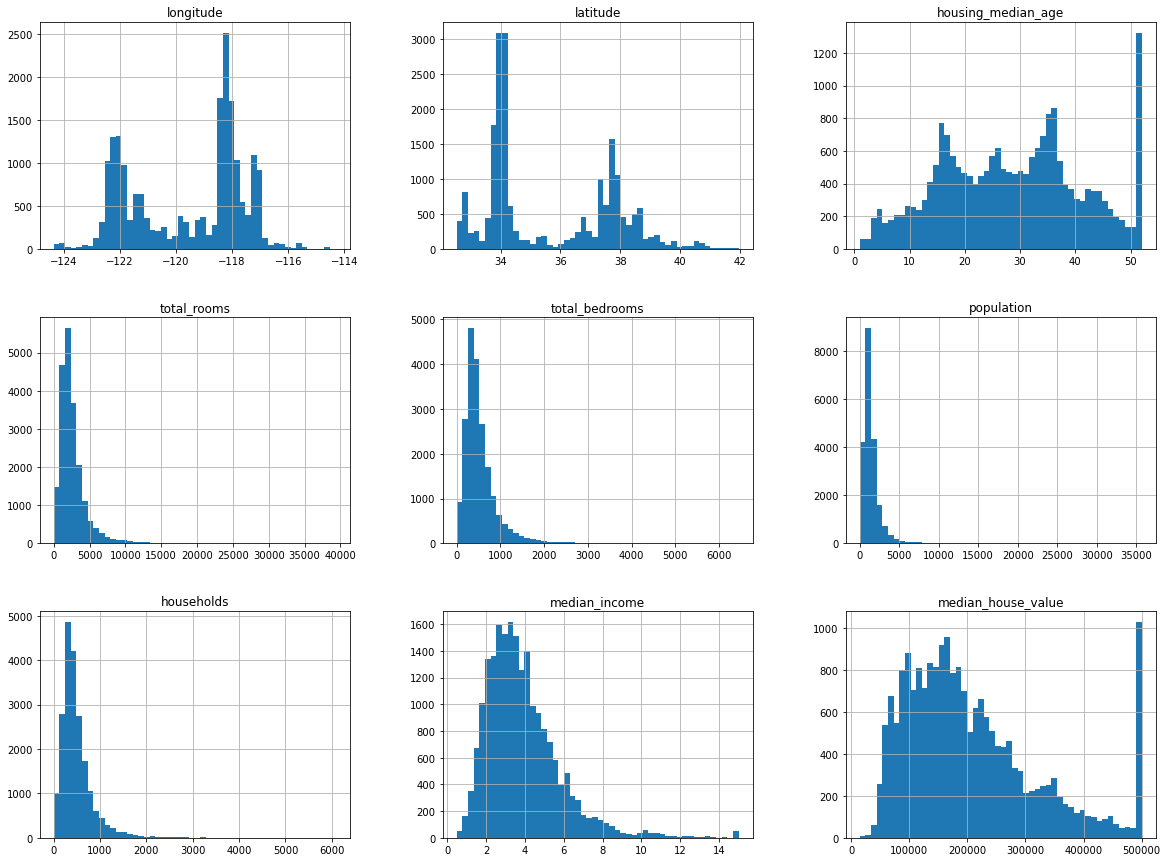

In [8]:
# Visualization 
housing.hist(bins = 50, figsize = (20,15))
plt.show()

## Understand the data (Do a proper data analysis before chosing the ML method)

**Notice:** 
1. Medium income attribute does not look like it is expressed in USD. The number represents roughly tens of thousands of dollar
   (3 = $30,000). This is ann example of preprocessed attributes, but we must try to understand how the data was computed.
2. The housing medium age and the median house value are also capped. The latter may be a serious problem since its our target 
   attribute(label)

- Understand how -- So the Ml algorithm may learn that prices never go beyond that limit. So for this one must check with client team to see if this is a problem or not.

- If they tell you that they need precise predictions even beyond 50,000 USD, then you have mainly two options:
a. Collect proper labels for the districts whose labels were capped.
b. Remove those districts from the training set (and also from the test set,since your system should not be evaluated poorly if it predicts values beyond 50,000 USD)

3. These attributes have very differentt scales
4. Many histograms are tail heavy. This may make it harder for some Ml algorithm to detect patterns. We will try transforming these attributes on to have more bell-shaped distribution.

#### Random sampling method (generally fine if your dataset is large enough)

In [9]:
train_set, test_set = train_test_split(housing, test_size = 0.3, random_state = 42)

In [24]:
train_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,193800.0,<1H OCEAN
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,169700.0,NEAR OCEAN
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,259800.0,NEAR OCEAN
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,136100.0,INLAND
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,500001.0,NEAR BAY
15283,-117.33,33.17,11.0,10923.0,2041.0,4773.0,1858.0,4.0791,281300.0,NEAR OCEAN
18551,-122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN
7555,-118.19,33.91,33.0,915.0,225.0,826.0,212.0,2.7708,117400.0,<1H OCEAN
15700,-122.44,37.79,52.0,1817.0,535.0,800.0,487.0,3.9750,500001.0,NEAR BAY
12364,-116.46,33.82,6.0,4863.0,920.0,3010.0,828.0,3.9508,104200.0,INLAND


#### Stratified sampling

Supppose an expert told you that the medium income is very important tp predict medium housing price. Since the medium income is a continuous numerical attribute, you first need to create an income category attribute. 

It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum's importance may be biased.  This means that one should not have too many strata, and each stratum should be large enough. 

- The following code uses the pd.cut() function to create an income category attribute with 5 categories (labeled from 1 to 5):
category 1 ranges from 0 to 1.5 (i.e less than 15000 USD ), category 2 ranges from 1.5 to 3 etc. ..

<AxesSubplot:>

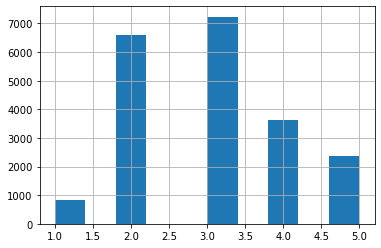

In [11]:
housing['income_cat'] = pd.cut(housing['median_income'], 
                              bins = [0.0, 1.5, 3, 4.5, 6.0, np.inf],
                              labels = [1, 2, 3, 4, 5])

housing['income_cat'].hist()

In [20]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 1)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
strat_train_set['income_cat'].value_counts() / len(strat_test_set)

3    0.817991
2    0.744025
4    0.411337
5    0.267119
1    0.092862
Name: income_cat, dtype: float64

In [23]:
strat_train_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
19423,-121.04,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,4
417,-122.26,37.90,37.0,2220.0,335.0,903.0,362.0,7.8336,371300.0,NEAR BAY,5
13022,-121.23,38.69,19.0,5268.0,849.0,2357.0,849.0,3.9226,148700.0,INLAND,3
19872,-119.29,36.34,35.0,1235.0,369.0,1246.0,341.0,1.4740,71000.0,INLAND,1
15034,-116.99,32.78,29.0,1114.0,163.0,385.0,154.0,5.4333,222800.0,<1H OCEAN,4
6498,-118.03,34.08,37.0,775.0,179.0,726.0,183.0,3.2500,159200.0,INLAND,3
4636,-118.29,34.06,42.0,3894.0,2293.0,6846.0,2156.0,1.5553,70000.0,<1H OCEAN,2
268,-122.19,37.78,52.0,2492.0,415.0,1109.0,375.0,4.3125,164400.0,NEAR BAY,3
7443,-118.19,33.96,40.0,979.0,296.0,934.0,292.0,2.6354,151800.0,<1H OCEAN,2
8274,-118.17,33.77,25.0,4405.0,1262.0,2178.0,1090.0,3.0503,225000.0,NEAR OCEAN,3


In [25]:
# Remove the income_cat attribute so that data is back to its original state:

for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)
    

**Spent quite a bit of time on test set generation for a good reason: this is an often neglected but critical part of Machine Learning.**

## Discover and Visualize the data to gain insights

In [26]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

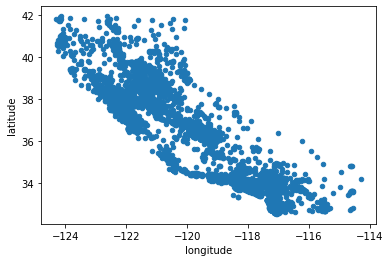

In [27]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

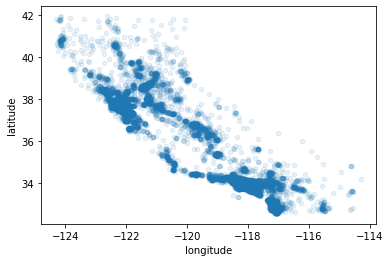

In [34]:
# Let's make the visualization easire by setting alpha = 0.1
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

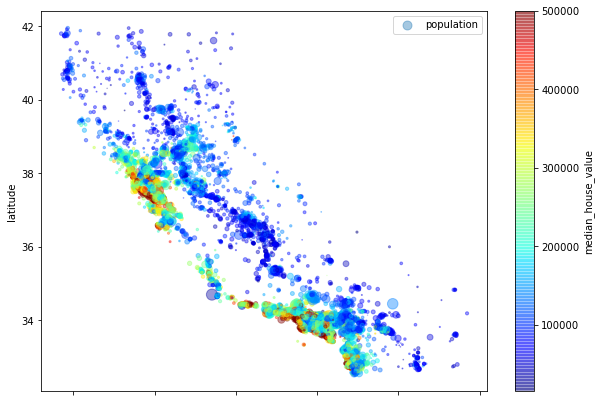

In [42]:
# let's us look at the housing prices ( s - radius of each circle represents the district's population; the color represents the price)
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, 
            s = housing['population'] / 100, label = 'population', figsize = (10,7),
            c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)

plt.legend()

- From the image we can understand that the housing price are very much related to the location (e.g., close to the ocean) and to the population density. 

#### Looking for Correlations - 1 way

- One can easily compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes using the corr() method:

In [44]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.685637
total_rooms           0.139536
housing_median_age    0.105457
households            0.069426
total_bedrooms        0.053722
population           -0.022511
longitude            -0.045556
latitude             -0.144757
Name: median_house_value, dtype: float64

**The correlation coefficient ranges from -1 to 1.**
- When it is close to 1, it means that there is a strong positive correlation;e.g. the median house value tends to go up when the medium income goes up.
- When the coefficient is close to -1,, it means that there is a strong negative correlation; one can see a small negative correlationbetween the latitude and medium house value i.e. prices have a slight tendency to go down when you go north
- Coefficent close to zero mean that there is no linear correlation.

#### Correction - 2 way

- Using Pandas scatter_matrix function

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

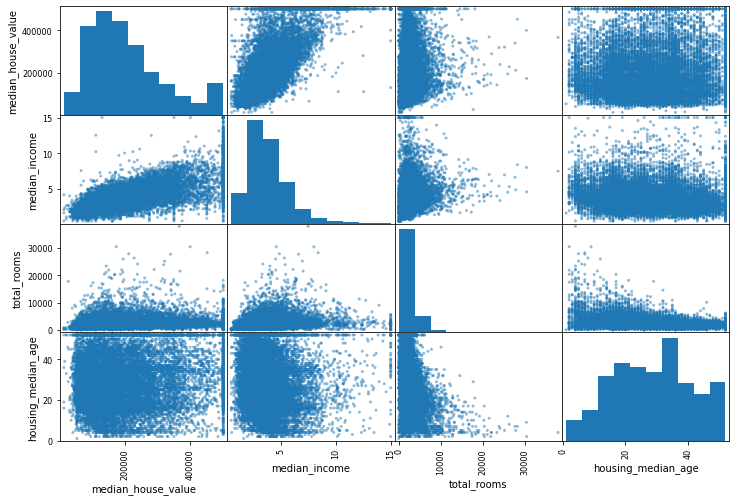

In [46]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

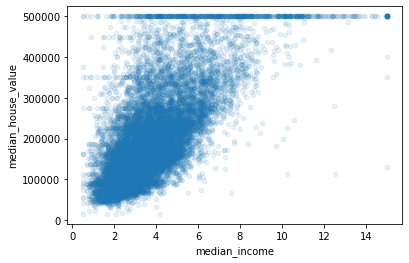

In [47]:
# Most promising attribute to predict the median house value is the median income, let's zoom on their correlation scatterplot

housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

#### Experiment with various attribute combinations

